DYN: Dynamic Mic version\
HSM: Headset Mic version\
LRX: Larynx Mic version\

我用的DYN， 就环境音小一点\
女高：DCS_LI_FullChoir_Take01_S1_LRX.wav\
男低：DCS_LI_FullChoir_Take01_B2_LRX.wav\
combined_audio: combined

In [1]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


Load and preprocess data

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
audio_path = 'DagstuhlChoirSet_V1.2.3/audio_wav_22050_mono'
soprano_audio,soprano_sample_rate = librosa.load(audio_path+'/DCS_LI_FullChoir_Take01_S1_LRX.wav', sr=22050,mono=True)
bass_audio,bass_sample_rate = librosa.load(audio_path+'/DCS_LI_FullChoir_Take01_B2_LRX.wav', sr=22050,mono=True)

#print(soprano_audio.shape)
#print(soprano_sample_rate)
#print(bass_audio.shape)
#print(bass_sample_rate)

mixed the audio

In [4]:
from pydub import AudioSegment
soprano = AudioSegment.from_wav(audio_path+'/DCS_LI_FullChoir_Take01_S1_LRX.wav')
bass = AudioSegment.from_wav(audio_path+'/DCS_LI_FullChoir_Take01_B2_LRX.wav')
combined = soprano.overlay(bass)
combined.export("combined.wav", format='wav')

combined_audio, combined_sample_rate = librosa.load('combined.wav', sr=22050,mono=True)


C:\Users\mrm\AppData\Local\Temp\ipykernel_20484\3656754578.py:2: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(soprano_audio, sr=soprano_sample_rate, ax=ax,x_axis='time')
C:\Users\mrm\AppData\Local\Temp\ipykernel_20484\3656754578.py:7: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(bass_audio, sr=bass_sample_rate
C:\Users\mrm\AppData\Local\Temp\ipykernel_20484\3656754578.py:13: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(combined_audio, sr=combined_sample_rate, ax=ax,x_axis='time')


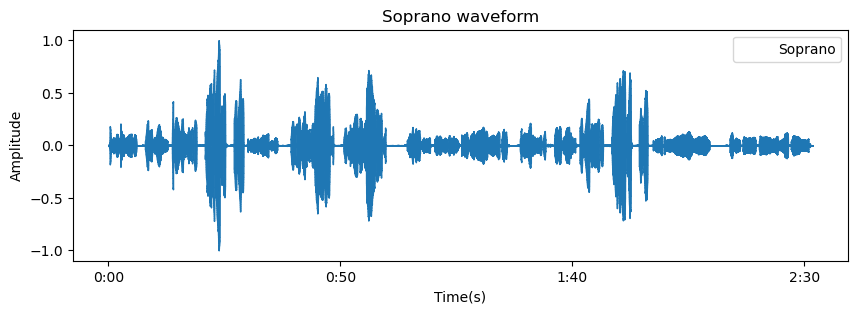

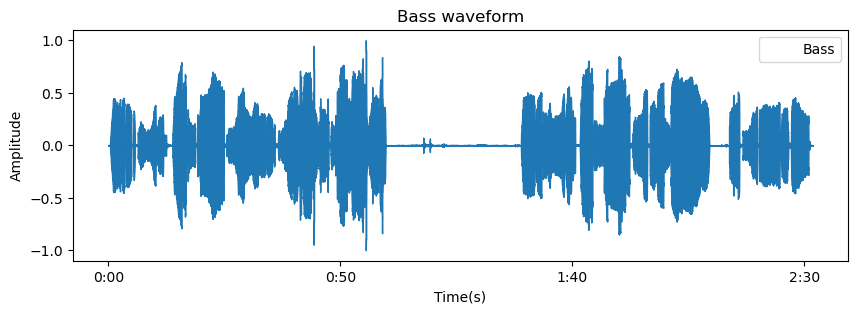

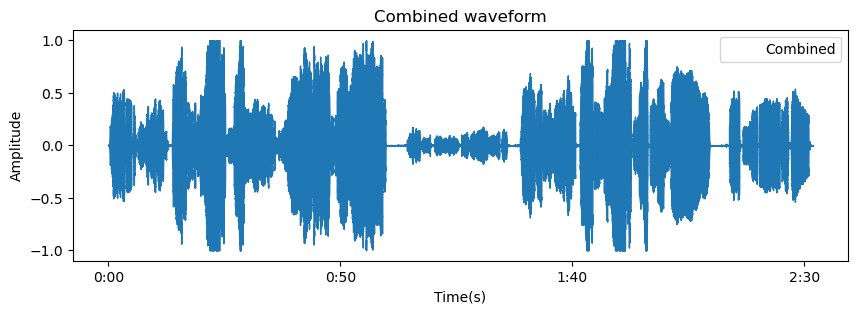

In [5]:
fig, ax = plt.subplots(figsize=(10,3))
librosa.display.waveshow(soprano_audio, sr=soprano_sample_rate, ax=ax,x_axis='time')    
ax.set(title='Soprano waveform', xlabel='Time(s)', ylabel='Amplitude')
ax.legend(['Soprano'])

fig, ax = plt.subplots(figsize=(10,3))
librosa.display.waveshow(bass_audio, sr=bass_sample_rate
, ax=ax,x_axis='time')
ax.set(title='Bass waveform', xlabel='Time(s)', ylabel='Amplitude')
ax.legend(['Bass'])

fig, ax = plt.subplots(figsize=(10,3))
librosa.display.waveshow(combined_audio, sr=combined_sample_rate, ax=ax,x_axis='time')
ax.set(title='Combined waveform', xlabel='Time(s)', ylabel='Amplitude')
ax.legend(['Combined'])


Spectrogram

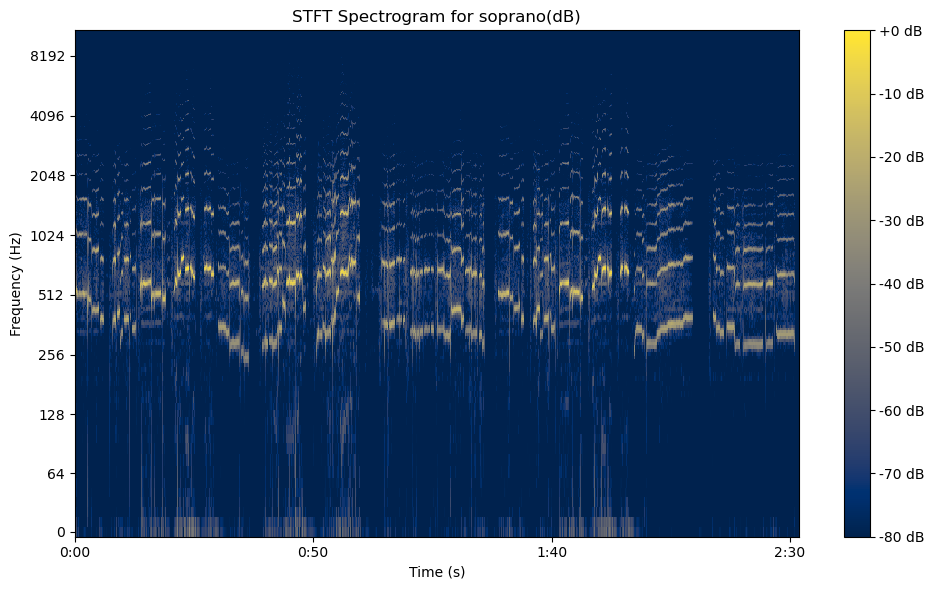

In [6]:
n_fft = 2048
hop_length = 512
soprano_stft = librosa.stft(soprano_audio, n_fft=n_fft, hop_length=hop_length)
soprano_spectrogram = np.abs(soprano_stft)
soprano_spectrogram_db = librosa.amplitude_to_db(soprano_spectrogram, ref=np.max)   

plt.figure(figsize=(10, 6))
librosa.display.specshow(soprano_spectrogram_db, sr=soprano_sample_rate, hop_length=hop_length, x_axis='time', y_axis='log',cmap='cividis')
plt.title('STFT Spectrogram for soprano(dB)')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

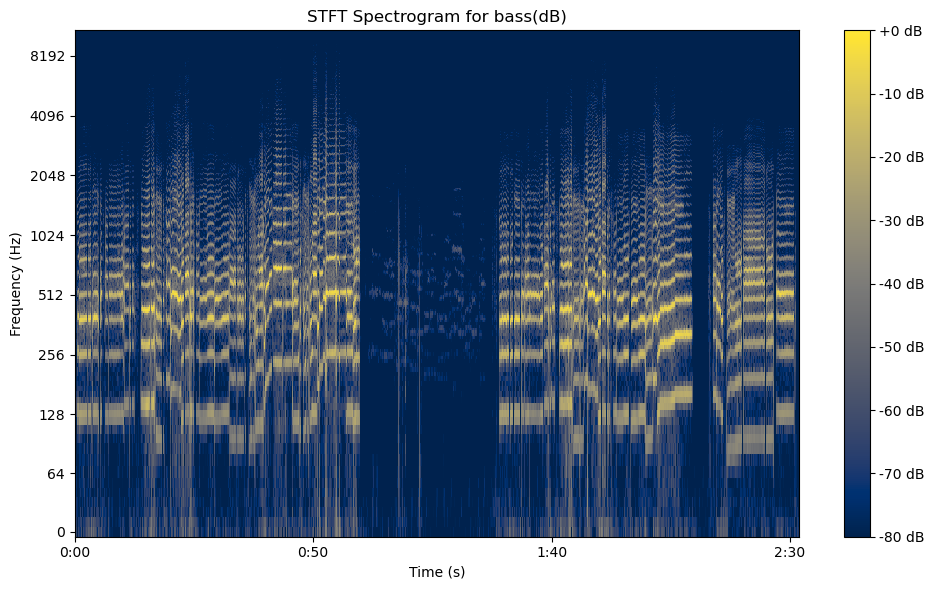

In [7]:
bass_stft = librosa.stft(bass_audio, n_fft=n_fft, hop_length=hop_length)
bass_spectrogram = np.abs(bass_stft)
bass_spectrogram_db = librosa.amplitude_to_db(bass_spectrogram, ref=np.max)   

plt.figure(figsize=(10, 6))
librosa.display.specshow(bass_spectrogram_db, sr=bass_sample_rate, hop_length=hop_length, x_axis='time', y_axis='log',cmap='cividis')
plt.title('STFT Spectrogram for bass(dB)')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

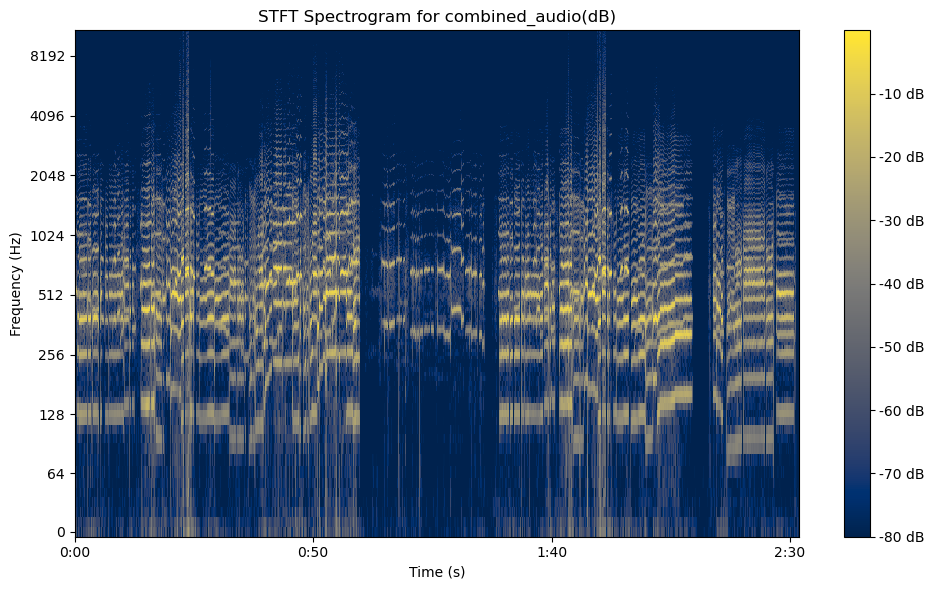

In [8]:
combined_stft = librosa.stft(combined_audio, n_fft=n_fft, hop_length=hop_length)
combined_spectrogram_magnitude  = np.abs(combined_stft)
combined_sepctrogram_angle = np.angle(combined_stft)
combined_spectrogram_db = librosa.amplitude_to_db(combined_spectrogram_magnitude, ref=np.max)   

plt.figure(figsize=(10, 6))
librosa.display.specshow(combined_spectrogram_db, sr=combined_sample_rate, hop_length=hop_length, x_axis='time', y_axis='log',cmap='cividis')
plt.title('STFT Spectrogram for combined_audio(dB)')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

NMF

In [9]:
epsilone = 1e-10
n_component = 2
seprate = 2
V = combined_spectrogram_magnitude + epsilone
K,N = np.shape(V)
print(K,N)


1025 6541


$\beta$ Divergence \
$\beta = 2$ - Euclidean Distance \
$\beta = 1$ - KL divergence \
$\beta = 0$ - IS divergence

In [10]:
def beta_divergence(V,W,H, beta = 2):
    WH = np.dot(W,H)
    if beta == 2:
        return 0.5 * np.linalg.norm(V-WH)**2
    elif beta == 1:
        return np.sum(V/WH - np.log(V/WH) - 1)
    elif beta == 0:
        return np.sum(V/W - np.log(V/W) - 1)
    else:
        return np.sum((V**beta + (beta-1)*WH**beta - beta*V*WH**(beta-1)*V)/((beta-1)*beta))

visualization function : 画w和H的图像，和WXH的频谱图

In [11]:
import matplotlib
def plot_NMF_iter(W, H,beta,iteration = None): 
    f = plt.figure(figsize=(4,4))
    f.suptitle(f"NMF Iteration {iteration}, for beta = {beta}", fontsize=8,)
    
    # definitions for the axes
    V_plot = plt.axes([0.35, 0.1, 1, 0.6])
    H_plot = plt.axes([0.35, 0.75, 1, 0.15])
    W_plot = plt.axes([0.1, 0.1, 0.2, 0.6])

    D = librosa.amplitude_to_db(W@H, ref = np.max)

    librosa.display.specshow(W,y_axis = 'hz', sr=combined_sample_rate, hop_length=hop_length,x_axis ='time',cmap= matplotlib.cm.jet, ax=W_plot)
    librosa.display.specshow(H,y_axis = 'hz', sr=combined_sample_rate, hop_length=hop_length,x_axis ='time',cmap= matplotlib.cm.jet, ax=H_plot)
    librosa.display.specshow(D,y_axis = 'hz', sr=combined_sample_rate, hop_length=hop_length,x_axis ='time',cmap= matplotlib.cm.jet, ax=V_plot)

    W_plot.set_title('Dictionnary W', fontsize=10)
    H_plot.set_title('Temporal activations H', fontsize=10)

    W_plot.axes.get_xaxis().set_visible(False)
    H_plot.axes.get_xaxis().set_visible(False)
    V_plot.axes.get_yaxis().set_visible(False)

NMF

In [12]:
def NMF(V, seprate, beta = 2, thredhold = 0.05, MAXITER = 5000, display = True, displayEveryNiter = None):
    counter = 0
    cost_function = []
    beta_diver = 1
    
    K,N = np.shape(V)
    W = np.abs(np.random.normal(loc=0, scale=2.5, size=(K, seprate)))
    H = np.abs(np.random.normal(loc=0, scale=2.5, size=(seprate, N)))
    
    if display ==   True: 
        plot_NMF_iter(W, H, beta, counter)
    
    while beta_diver >= thredhold and counter <= MAXITER:
        WH = W @ H  
        H *= (W.T @ ((WH ** (beta - 2)) * V)) / (W.T @ (WH ** (beta - 1)) + 1e-10)
        
        WH = W @ H 
        W *= (((WH ** (beta - 2)) * V) @ H.T) / ((WH ** (beta - 1)) @ H.T + 1e-10)
        
        beta_diver = beta_divergence(V, W, H, beta)
        cost_function.append(beta_diver)
        
        if display == True and counter % displayEveryNiter == 0: 
            plot_NMF_iter(W, H, beta, counter)
        
        counter += 1
    
    if counter-1==MAXITER :
        print(f"Stop afger {MAXITER} iterations")    
    return W,H,cost_function
   

Stop afger 50 iterations


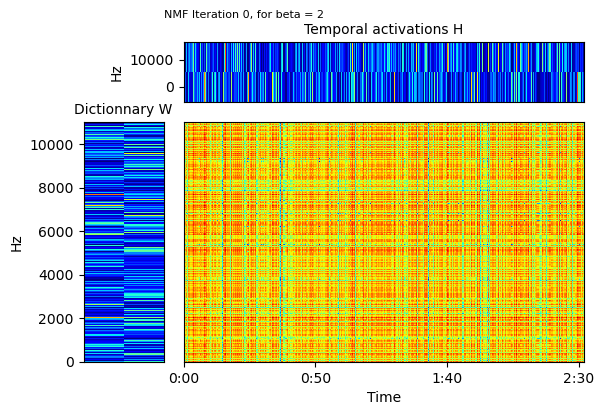

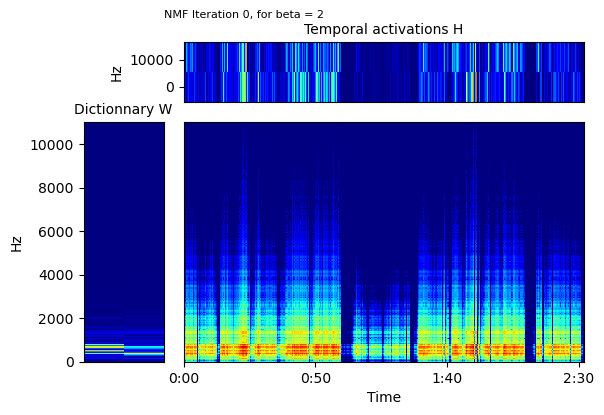

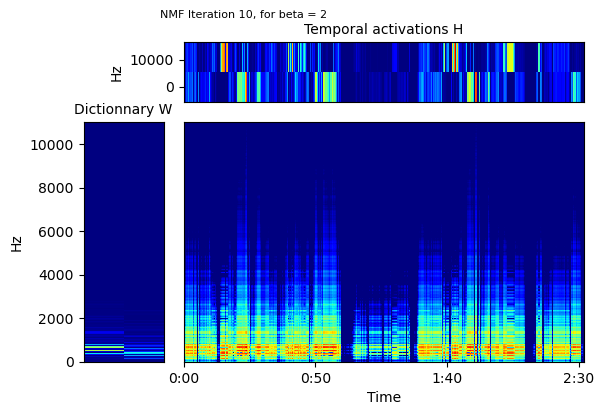

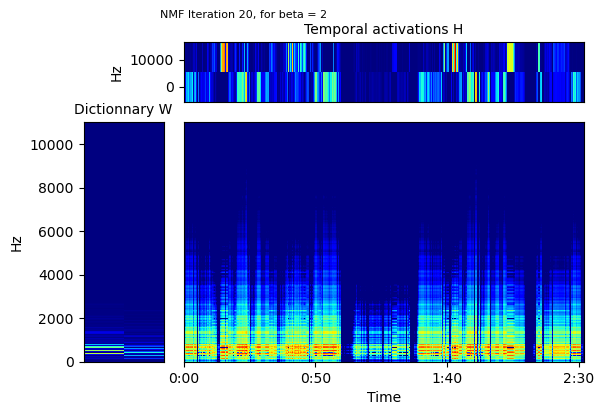

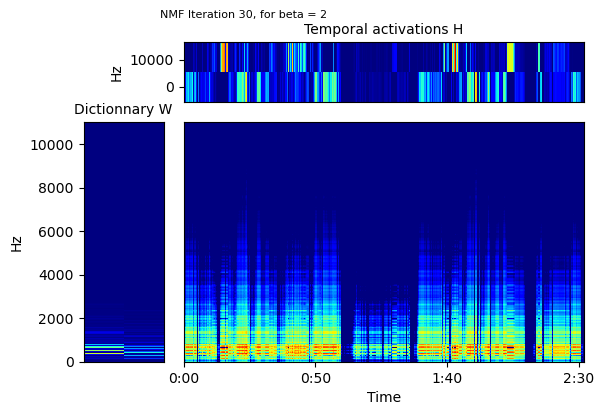

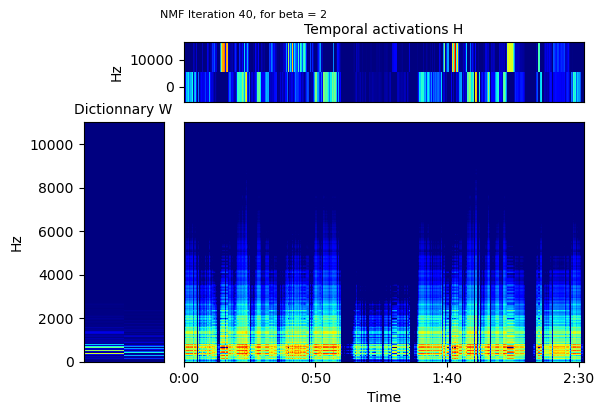

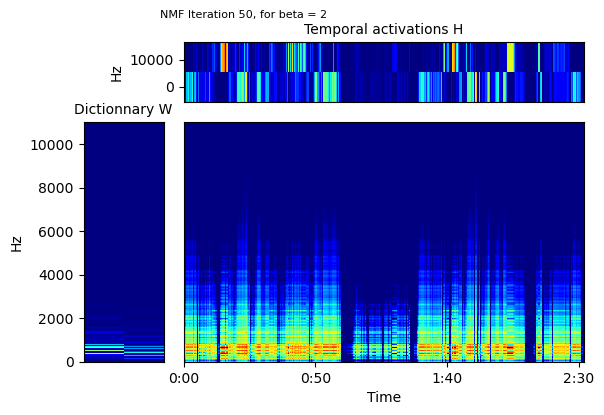

In [13]:
beta = 2
W, H, cost_function = NMF(V, seprate, beta = beta, thredhold=0.05, MAXITER=50, displayEveryNiter=10)

Text(0, 0.5, 'Beta Divergence for beta = 2 ')

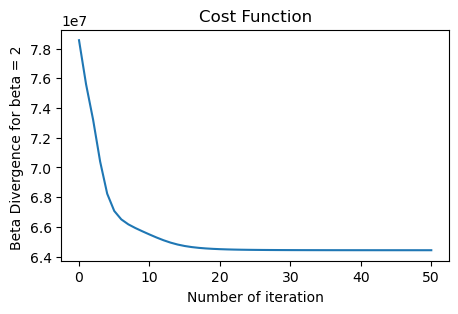

In [14]:
plt.figure(figsize=(5,3))
plt.plot(cost_function)
plt.title("Cost Function")
plt.xlabel("Number of iteration")
plt.ylabel(f"Beta Divergence for beta = {beta} ")

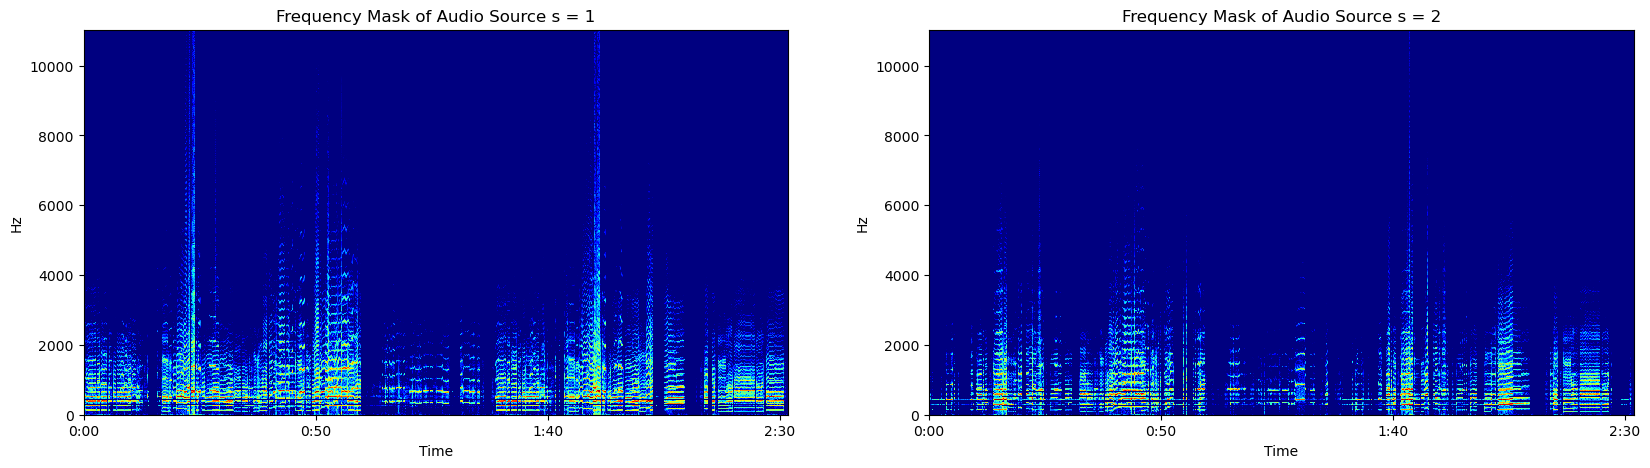

In [15]:
f, axs = plt.subplots(nrows=1, ncols=seprate,figsize=(20,5))
filtered_spectrograms = []
for i in range(seprate):
    axs[i].set_title(f"Frequency Mask of Audio Source s = {i+1}") 
    WsHs = W[:,[i]]@H[[i],:]
    filtered_spectrogram = W[:,[i]]@H[[i],:] /(W@H) * V 
    D = librosa.amplitude_to_db(filtered_spectrogram, ref = np.max)
    librosa.display.specshow(D,y_axis = 'hz', sr=bass_sample_rate,hop_length=hop_length,x_axis ='time',cmap= matplotlib.cm.jet, ax = axs[i])
    
    filtered_spectrograms.append(filtered_spectrogram)

In [16]:
reconstructed_sounds = []
for i in range(seprate):
    reconstruct = filtered_spectrograms[i] * np.exp(1j*combined_sepctrogram_angle)
    new_sound   = librosa.istft(reconstruct, n_fft = n_fft, hop_length = hop_length)
    reconstructed_sounds.append(new_sound)

C:\Users\mrm\AppData\Local\Temp\ipykernel_20484\3772207297.py:4: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(reconstructed_sounds[i], sr=combined_sample_rate, color = colors[i], ax=ax[i],label=f'Source {i}',x_axis='time')


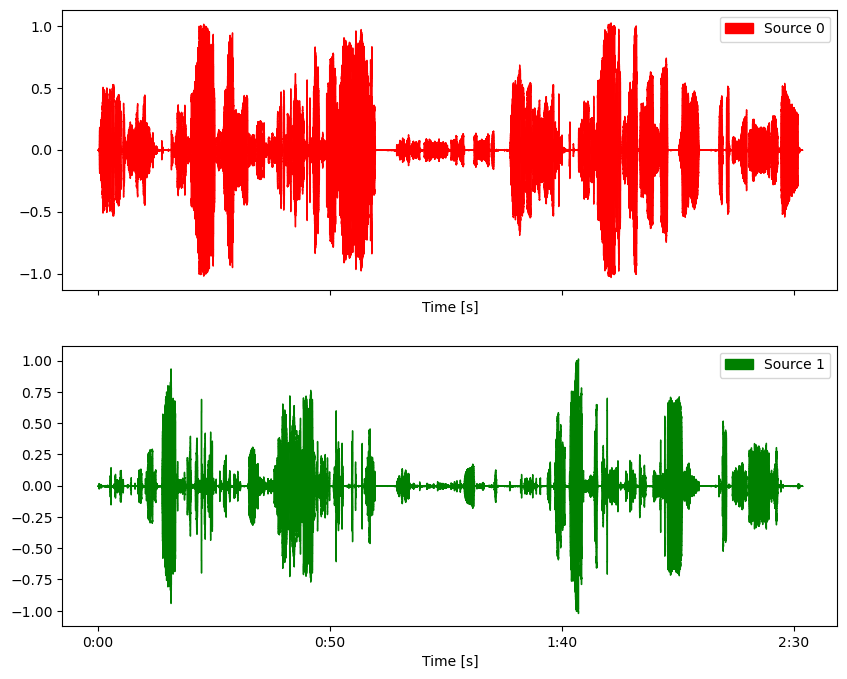

In [17]:
colors = ['r', 'g']
fig, ax = plt.subplots(nrows=seprate, ncols=1, sharex=True, figsize=(10, 8))
for i in range(seprate):
    librosa.display.waveshow(reconstructed_sounds[i], sr=combined_sample_rate, color = colors[i], ax=ax[i],label=f'Source {i}',x_axis='time')
    ax[i].set(xlabel='Time [s]')
    ax[i].legend()

In [18]:
import IPython.display as ipd
for i in range(seprate):
    ipd.display(f"Source {i}",ipd.Audio(reconstructed_sounds[i], rate=combined_sample_rate))

NameError: name 'sr' is not defined